In [1]:
from my_functions import *

orbits fs = 0.05 Hz, orbits t0 = 12160.0 s,  orbit_duration = 1424.0 d
Number of Verification Binaries = 1


In [2]:
d,dr = -1,dur_range[-1]
fp1 = 'measurements/tm_asds/'+str(dr)+'d/1/fs0.txt'
fp2 = "measurements/tm_asds/"+str(dr)+"d/mdata/binary_"

rawdata = ascii.read(fp1)
fsdata = np.array([rawdata['t'],rawdata['A'],rawdata['E']])
# print (fsdata.shape)
# mdata_1b = np.zeros((1+2*N2,len(fsdata[0])))

# mdata = np.zeros((Ngalbins,1+2*N2,len(fsdata[0])))
# print (mdata_1b.shape)
# print (mdata.shape)
# for j in range(Ngalbins):
#     rawdata = ascii.read(fp2+str(j)+'.txt')
#     mdata_1b[0] = rawdata['t']
#     for i in range(N2):
#         mdata_1b[1+i*2:3+i*2] = np.array([rawdata['A'+str(i)],rawdata['E'+str(i)]])
#     mdata[j] = mdata_1b

# mdata_tot_A0 = np.zeros((3,len(fsdata[0])))
# mdata_tot_A0[0] = mdata[0][0]
# for i in range(2):
#     for j in range(Ngalbins):
#         # plt.plot(mdata[0][0],mdata[j,1+2*i+N2//2])
#         # plt.show()
#         mdata_tot_A0[i+1] += mdata[j,2+i+N2//2]
# print (mdata_tot_A0.shape)
# # plt.plot(mdata_tot_A0[0],mdata_tot_A0[1])

In [3]:
# mdata = np.zeros(fsdata.shape)

rawdata = ascii.read(fp2+'0.txt')

iopt = N2//2

# mdata[0] = rawdata['t']
# mdata[1] = rawdata['A'+str(iopt)]
# mdata[2] = rawdata['E'+str(iopt)]

# mdata = np.array([rawdata['t'], rawdata['A0'],rawdata['E0']])
mdata = np.array([rawdata['t'], rawdata['A'],rawdata['E']])
mdata[1:] = mdata[1:] * Amp_range[0,iopt]

mdata_all = np.zeros((N2,2,mdata.shape[-1]))
for i,Amp in enumerate(tqdm(Amp_range[0])):
    mdata_all[i] = np.copy(mdata[1:])*(Amp/Amp_true[0])

# rawdata2 = ascii.read(fp2+'1.txt')
# mdata2 = np.array([rawdata2['t'], rawdata2['A'],rawdata2['E']])
# mdata2[1:] = mdata2[1:] * Amp_range[1,iopt]

100%|██████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 2289.31it/s]


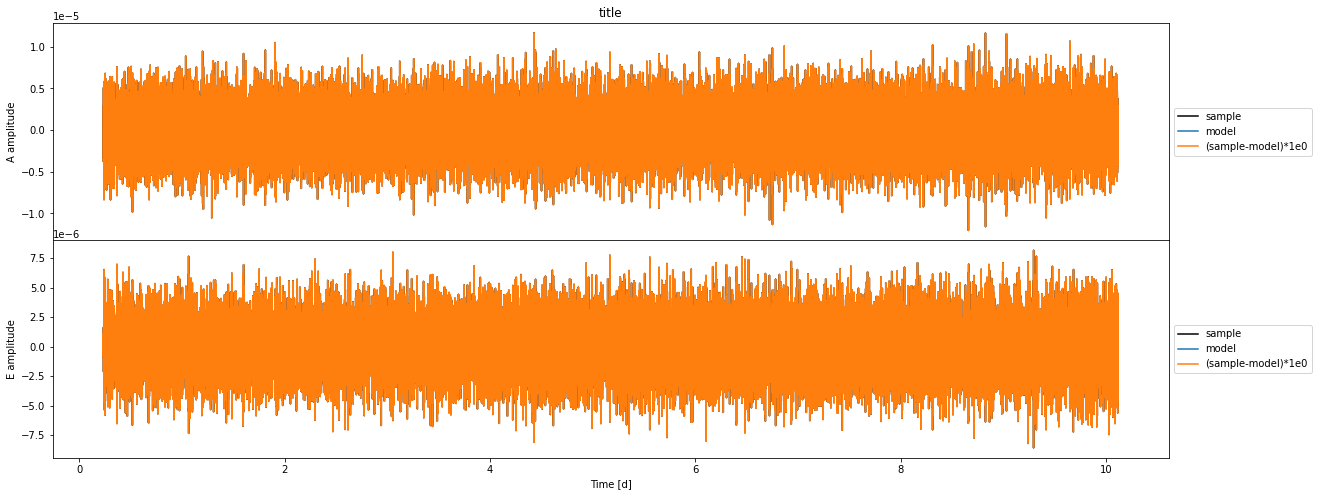

In [4]:

# plt.plot(x,y,c='black',alpha=.8)
for j in [range(N2)[N2//2]]:
    fig, axs = plt.subplots(2,sharex=True,figsize=(20,8),gridspec_kw={'hspace':0})
    for k in range(2):
            # axs[k].plot(mdata_1b[0]/day,mdata_1b[1+2*j+k],label=str(N2-N2//2))
        axs[k].plot(fsdata[0]/day,fsdata[1+k],c='black',label='sample')
        
        mdatot = np.copy(mdata[1+k])
        # mdatot += mdata2[1+k]
        
        
        axs[k].plot(mdata[0]/day,mdatot,label="model")
        Amplification = 1#e14
        axs[k].plot(mdata[0]/day,(fsdata[1+k]-mdatot)*Amplification,label="(sample-model)*1e"+str(int(np.log10(Amplification))))
        # axs[k].plot(mdata[0]/day,(fsdata[1+k]-mdata[1+k])*1e3,label="sample-model")
        # axs[k].plot(mdata[0]/day,mdata[1+k]*Amp_range[0,iopt],label="model")
        # axs[k].plot(mdata[0]/day,(fsdata[1+k]-mdata[1+k]*Amp_range[0,iopt])*1e3,label="sample-model")
        
        axs[k].set_ylabel("{} amplitude".format(rec[k]))
        axs[k].legend(bbox_to_anchor=(1,.5),loc="center left")
        # axs[k].set_ylim(1e-5*np.array([-1,1]))
    axs[0].set_title("title")
    # axs[0].legend(loc=1)
    # axs[k].set_xlim(1,1.05)
    # axs[k].set_xlim(5,5.05)
    axs[k].set_xlabel("Time [d]")
    plt.show()

In [5]:
print (Amp_true)

[6.4e-23]


(array([0.00000000e+00, 1.17096019e-06, 2.34192037e-06, ...,
       2.49976581e-02, 2.49988290e-02, 2.50000000e-02]), array([1.17857710e-19, 1.12385338e-18, 1.54529166e-18, ...,
       1.40004840e-21, 4.93721301e-22, 6.98036449e-22]))


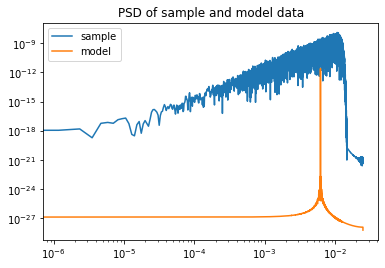

In [6]:
tmp = psd_func(fsdata[1])
tmp2 = psd_func(mdata[1])
print (tmp)
plt.title("PSD of sample and model data")
# plt.axvline(f_true[0],c='black')
plt.loglog(tmp[0],tmp[1],label='sample')
plt.loglog(tmp2[0],tmp2[1],label='model')
plt.legend()
plt.show()

fs_fft = make_fft(fsdata)
fs_fft2 = FFT(fsdata[1])

# plt.figure(figsize=(12,6))
# plt.title("PSD of model and signal data")
# # plt.axvline(f_true[0],c='black')
# plt.loglog(fs_fft[0].real,abs(fs_fft[1]*fs_fft[1]),label="Model")
# for j in range(N2):
#     m_fft = make_fft([mdata[0],mdata_all[j,0],mdata_all[j,1])
#     plt.loglog(m_fft[0].real,abs(fs_fft[1]*m_fft[1]),label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
#     # print (np.sum(abs(fs_fft[1]*m_fft[1])))
# # plt.xlim(f_true[0]*np.array([0.99,1.01]))
# plt.legend(loc=2)
# plt.show()

In [7]:

# plt.figure(figsize=(12,6))
# plt.plot(fsdata[0]/day, fsdata[1],label='Sample',c='black',zorder=100)
# for j in range(N2):
    
#     m_fft2 = FFT(mdata_all[j,0])
    
#     newy = IFFT(fs_fft2*m_fft2).real
#     # plt.plot(mdata[0]/day,newy,label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
#     # plt.plot(mdata[0]/day,mdata_all[j,0],label="model_data")
#     plt.plot(mdata_tmp[0]/day,mdata_tmp[1],label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
# plt.legend(bbox_to_anchor=(1,1),loc='upper left')
# plt.xlim(.5,.56)
# plt.show()


In [8]:
# Make the FFT's of the sample data 
make_bigmemplot = False

print (fs_fft.shape)
fs_fft = make_fft(fsdata)
fs_fft2A = FFT(fsdata[1])
fs_fft2E = FFT(fsdata[2])
fft_freq = np.fft.fftshift(np.fft.fftfreq(len(fsdata[1]), d=1/fs))

if make_bigmemplot:
    # Prepare plots and plot sample data
    n = 3
    fig,axs = plt.subplots(n,sharex = True,figsize=(16,5*n), gridspec_kw={"hspace":.1})
    # plt.plot(fsdata[0]/day,fsdata[1])
    axs[0].set_title("FFT of sample and signals of A channel")
    axs[0].plot(fs_fft[0].real, np.abs(fs_fft[1]),label='Sample',c='black',zorder=100)

    axs[1].set_title("Inner part of integral before normalisation of A channel")
    axs[1].plot(fft_freq.real, np.abs(fs_fft2A**2),label='Sample',c='black',zorder=100)

    axs[2].set_title("Inner part of integral after normalisation of A channel")
    axs[2].plot(fft_freq.real, np.abs(fs_fft2A**2),label='Sample',c='black',zorder=100)

# Prepare likelyhood range
N3 = 2 # 2 for A&E or 4 for all posibilities for shift and norm
L_range = np.zeros((N3,N2))

for j in tqdm(range(N2)):
# for j in [N2//2]:
# for j in [N2-1]:
# for j in [14,16,18]:
    
    # Import model data and create FFT's
    
    m_fft = make_fft([mdata[0],mdata_all[j,0],mdata_all[j,1]])
    m_fft2A = FFT(mdata_all[j,0])
    m_fft2E = FFT(mdata_all[j,1])
    
    # Calculate the inner parts of the integral of the matched filtering equation
    inner_int1A = np.abs((np.conj(fs_fft2A)*m_fft2A) + (fs_fft2A * np.conj(m_fft2A)))# - (np.abs(m_fft[k+1]**2)/2)*df
    # inner_int2A = np.abs((np.conj(fs_fft2A)*m_fft2A) + (fs_fft2A * np.conj(m_fft2A))) - .5*(np.abs(m_fft2A**2))
    # inner_int2E = np.abs((np.conj(fs_fft2E)*m_fft2E) + (fs_fft2E * np.conj(m_fft2E))) - .5*(np.abs(m_fft2E**2))
    inner_int2A = np.abs((np.conj(fs_fft2A)*m_fft2A) + (fs_fft2A * np.conj(m_fft2A))) - (np.abs(m_fft2A**2))
    inner_int2E = np.abs((np.conj(fs_fft2E)*m_fft2E) + (fs_fft2E * np.conj(m_fft2E))) - (np.abs(m_fft2E**2))
    inner_int3A = np.abs(fs_fft2A-m_fft2A)**2
    
    if make_bigmemplot:
        # Plot the results of this
        axs[0].plot(m_fft[0].real, np.abs(m_fft[1]),label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
        axs[1].plot(fft_freq.real, np.abs(inner_int1A), label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
        axs[2].plot(fft_freq.real, np.abs(inner_int2A), label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
    
    # Calculate the matched filtering value for each sample data
    if N3 == 4:
        L_range[0][j] = np.sum(inner_int1A)#/((Amp_range[0][j]/Amp_true[0]))
        L_range[1][j] = np.sum(inner_int1A)/((Amp_range[0][j]/Amp_true[0]))
        L_range[2][j] = np.sum(inner_int2A)#/((Amp_range[0][j]/Amp_true[0]))
        L_range[3][j] = np.sum(inner_int2A)/((Amp_range[0][j]/Amp_true[0]))
        # L_range[4][j] = np.sum(inner_int3A)
    elif N3 == 2:
        L_range[0][j] = np.sum(inner_int2A)
        L_range[1][j] = np.sum(inner_int2E)
    else:
        print ("ERROR")

if make_bigmemplot:
    # Fix last parts of the plot
    axs[1].legend(bbox_to_anchor=(1,.5),loc='center left')
    axs[n-1].set_xlabel("Freq [Hz]")
    for i in range(3):
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].grid()
    # axs[2].set_ylim(1e-19,1e-17)
    plt.show()


(3, 21349)


100%|███████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 118.22it/s]


In [9]:
# for j in [16,18]:
#     mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    
#     plt.plot(fsdata[0]/day,fsdata[1])
#     plt.plot(mdata_tmp[0]/day,mdata_tmp[1])
#     plt.show()
#     tmp = make_fft(mdata_tmp)
#     plt.figure(figsize=(20,6))
#     plt.loglog(fs_fft[0].real,np.abs(fs_fft[1]**2))
#     plt.loglog(tmp[0].real,np.abs(tmp[1]**2))
#     plt.show()
print ("RAM usage {} %".format(psutil.virtual_memory()[2]))

RAM usage 45.7 %


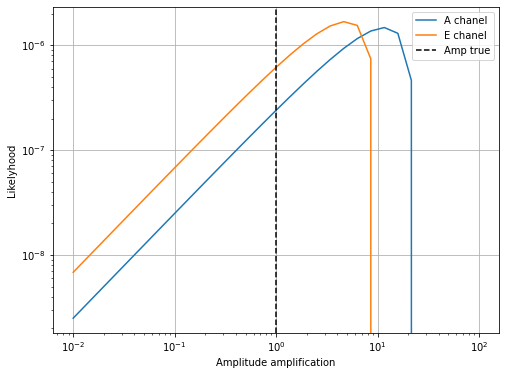

Max index of A = 23, so at amplitude of 11.65914 A$_0$
Max index of E = 20, so at amplitude of 4.64159 A$_0$


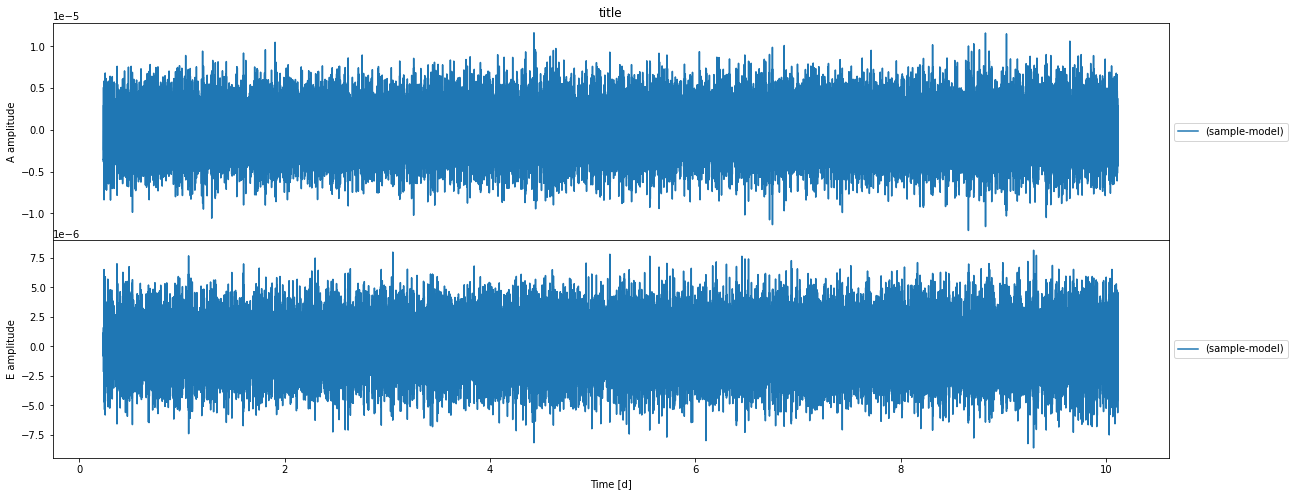

In [10]:
if N3 == 4:
    labels = ["no shift and no norm","no shift and norm","shift and no norm","shift and norm"]
    rec2 = ["ns-nn", "ns-n", "s-nn","s-n"]
elif N3 == 2:
    labels = ["A chanel","E chanel"]
    rec2 = ["A", "E"]
else:
    print ("ERROR")
    

# plot likelyhoods
i_max = np.zeros(len(labels),dtype=int)

plt.figure(figsize=(8,6))
for i,lab in enumerate(labels):
    # if i not in [1,3]:
    plt.plot(Amp_range[0]/Amp_true[0], L_range[i], label=lab)
    
    i_max[i] = np.where(L_range[i] == np.max(L_range[i]))[0][0]

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Amplitude amplification")
plt.ylabel("Likelyhood")
plt.axvline(1,c='black',linestyle='dashed',label="Amp true")
plt.legend()
# plt.ylim(1e-7*np.array([-1,1.5]))
plt.grid()
plt.show()

for i,im in enumerate(i_max):
    print ("Max index of {} = {}, so at amplitude of {:.5f} A$_0$".format(rec2[i],im,Amp_range[0][im]/Amp_true[0]))

fig, axs = plt.subplots(2,sharex=True,figsize=(20,8),gridspec_kw={'hspace':0})
for k,im in enumerate(i_max):
    mdata_tmp = np.copy(mdata)
    mdata_tmp[1:] = mdata_tmp[1:]*(Amp_range[0,im]/Amp_true[0])
    
    # axs[k].plot(fsdata[0]/day, fsdata[1+k], label="sample")
    # axs[k].plot(mdata_tmp[0]/day,mdata_tmp[1+k], label="model")
    axs[k].plot(mdata_tmp[0]/day,fsdata[1+k]-mdata_tmp[1+k], label="(sample-model)")
    
    axs[k].set_ylabel("{} amplitude".format(rec[k]))
    axs[k].legend(bbox_to_anchor=(1,.5),loc="center left")
axs[0].set_title("title")
# axs[0].legend(loc=1)
# axs[k].set_xlim(1,1.05)
# axs[k].set_xlim(5,5.05)
axs[k].set_xlabel("Time [d]")
plt.show()

# Testing FFT factors

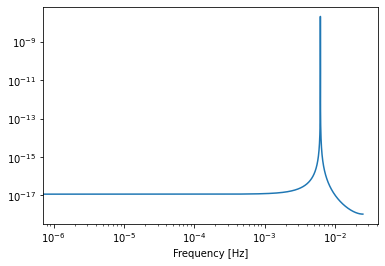

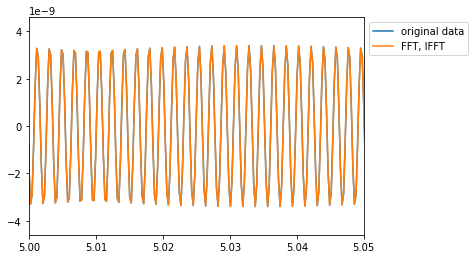

In [11]:
def make_fft2(data):
    tmp = []
    fft_freq = np.fft.fftshift(np.fft.fftfreq(len(data[1]), d=1/fs))
    fft_freq = fft_freq[len(fft_freq)//2:]
    for i in range(1,3):
        ffttmp = FFT(data[i])
        tmp.append(ffttmp[len(ffttmp)//2:]*2)
    fft = np.array([fft_freq, *tmp])
    return fft
    # return fft[:,1:]
m_fft = make_fft2(mdata)
m_fft2 = FFT(mdata[1])
    
plt.loglog(m_fft[0].real,abs(m_fft[1]**2))
plt.xlabel("Frequency [Hz]")
plt.show()

t0 = mdata[0,0]/day

plt.plot(mdata[0]/day-t0,mdata[1],label='original data')
# plt.plot((mdata[0]/day-t0)[:len(mdata[0])//2]*2,IFFT(m_fft[1]).real/2,label='altered FFTs')
plt.plot((mdata[0]/day-t0),IFFT(m_fft2).real,label='FFT, IFFT')
plt.xlim(5+np.array([0,0.05]))
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

In [7]:
# alpha = np.array([-2,-1,0,1,2],dtype=int)
alpha = np.logspace(-2,2,5)
print (alpha)


[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [12]:
alph_nm = []
for alph in alpha:
    tmp = int(np.log10(alph))
    if tmp<0:
        alph_nm.append((-tmp)*'0'+'1')
    elif tmp == 0:
        alph_nm.append('1')
    elif tmp > 0:
        alph_nm.append('1'+tmp*'0')
alph_nm = np.array(alph_nm)
print (alph_nm)

['001' '01' '1' '10' '100']
